In [1]:
from utils.roi import ROIProcessor

video_path = "video/video1.mp4"
model_path = "misc/face_landmarker.task"
landmarker = ROIProcessor(video_path, model_path)
R_means_dict, L_means_dict, M_means_dict, fps = landmarker.detect_with_calculate()

I0000 00:00:1734748762.464611   49705 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1734748762.465208   49705 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1734748762.505555   49971 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734748762.525813   49983 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing Frames: 100%|██████████| 481/481 [00:14<00:00, 32.41frame/s]


In [3]:
from utils.ppg import PPG_G, PPG_C

R_ROI_G_PPG = PPG_G(R_means_dict, fps).compute_signal()
R_ROI_G_PPG = R_ROI_G_PPG[:-1]
print("R_ROI_G_PPG: ", len(R_ROI_G_PPG))

R_ROI_C_PPG = PPG_C(R_means_dict, fps).compute_signal()
print("R_ROI_C_PPG: ", len(R_ROI_C_PPG))

L_ROI_G_PPG = PPG_G(L_means_dict, fps).compute_signal()
L_ROI_G_PPG = L_ROI_G_PPG[:-1]
print("L_ROI_G_PPG: ", len(L_ROI_G_PPG))

L_ROI_C_PPG = PPG_C(L_means_dict, fps).compute_signal()
print("L_ROI_C_PPG: ", len(L_ROI_C_PPG))

M_ROI_G_PPG = PPG_G(M_means_dict, fps).compute_signal()
M_ROI_G_PPG = M_ROI_G_PPG[:-1]
print("M_ROI_G_PPG: ", len(M_ROI_G_PPG))

M_ROI_C_PPG = PPG_C(M_means_dict, fps).compute_signal()
print("M_ROI_C_PPG: ", len(M_ROI_C_PPG))

R_ROI_G_PPG:  480
R_ROI_C_PPG:  480
L_ROI_G_PPG:  480
L_ROI_C_PPG:  480
M_ROI_G_PPG:  480
M_ROI_C_PPG:  480


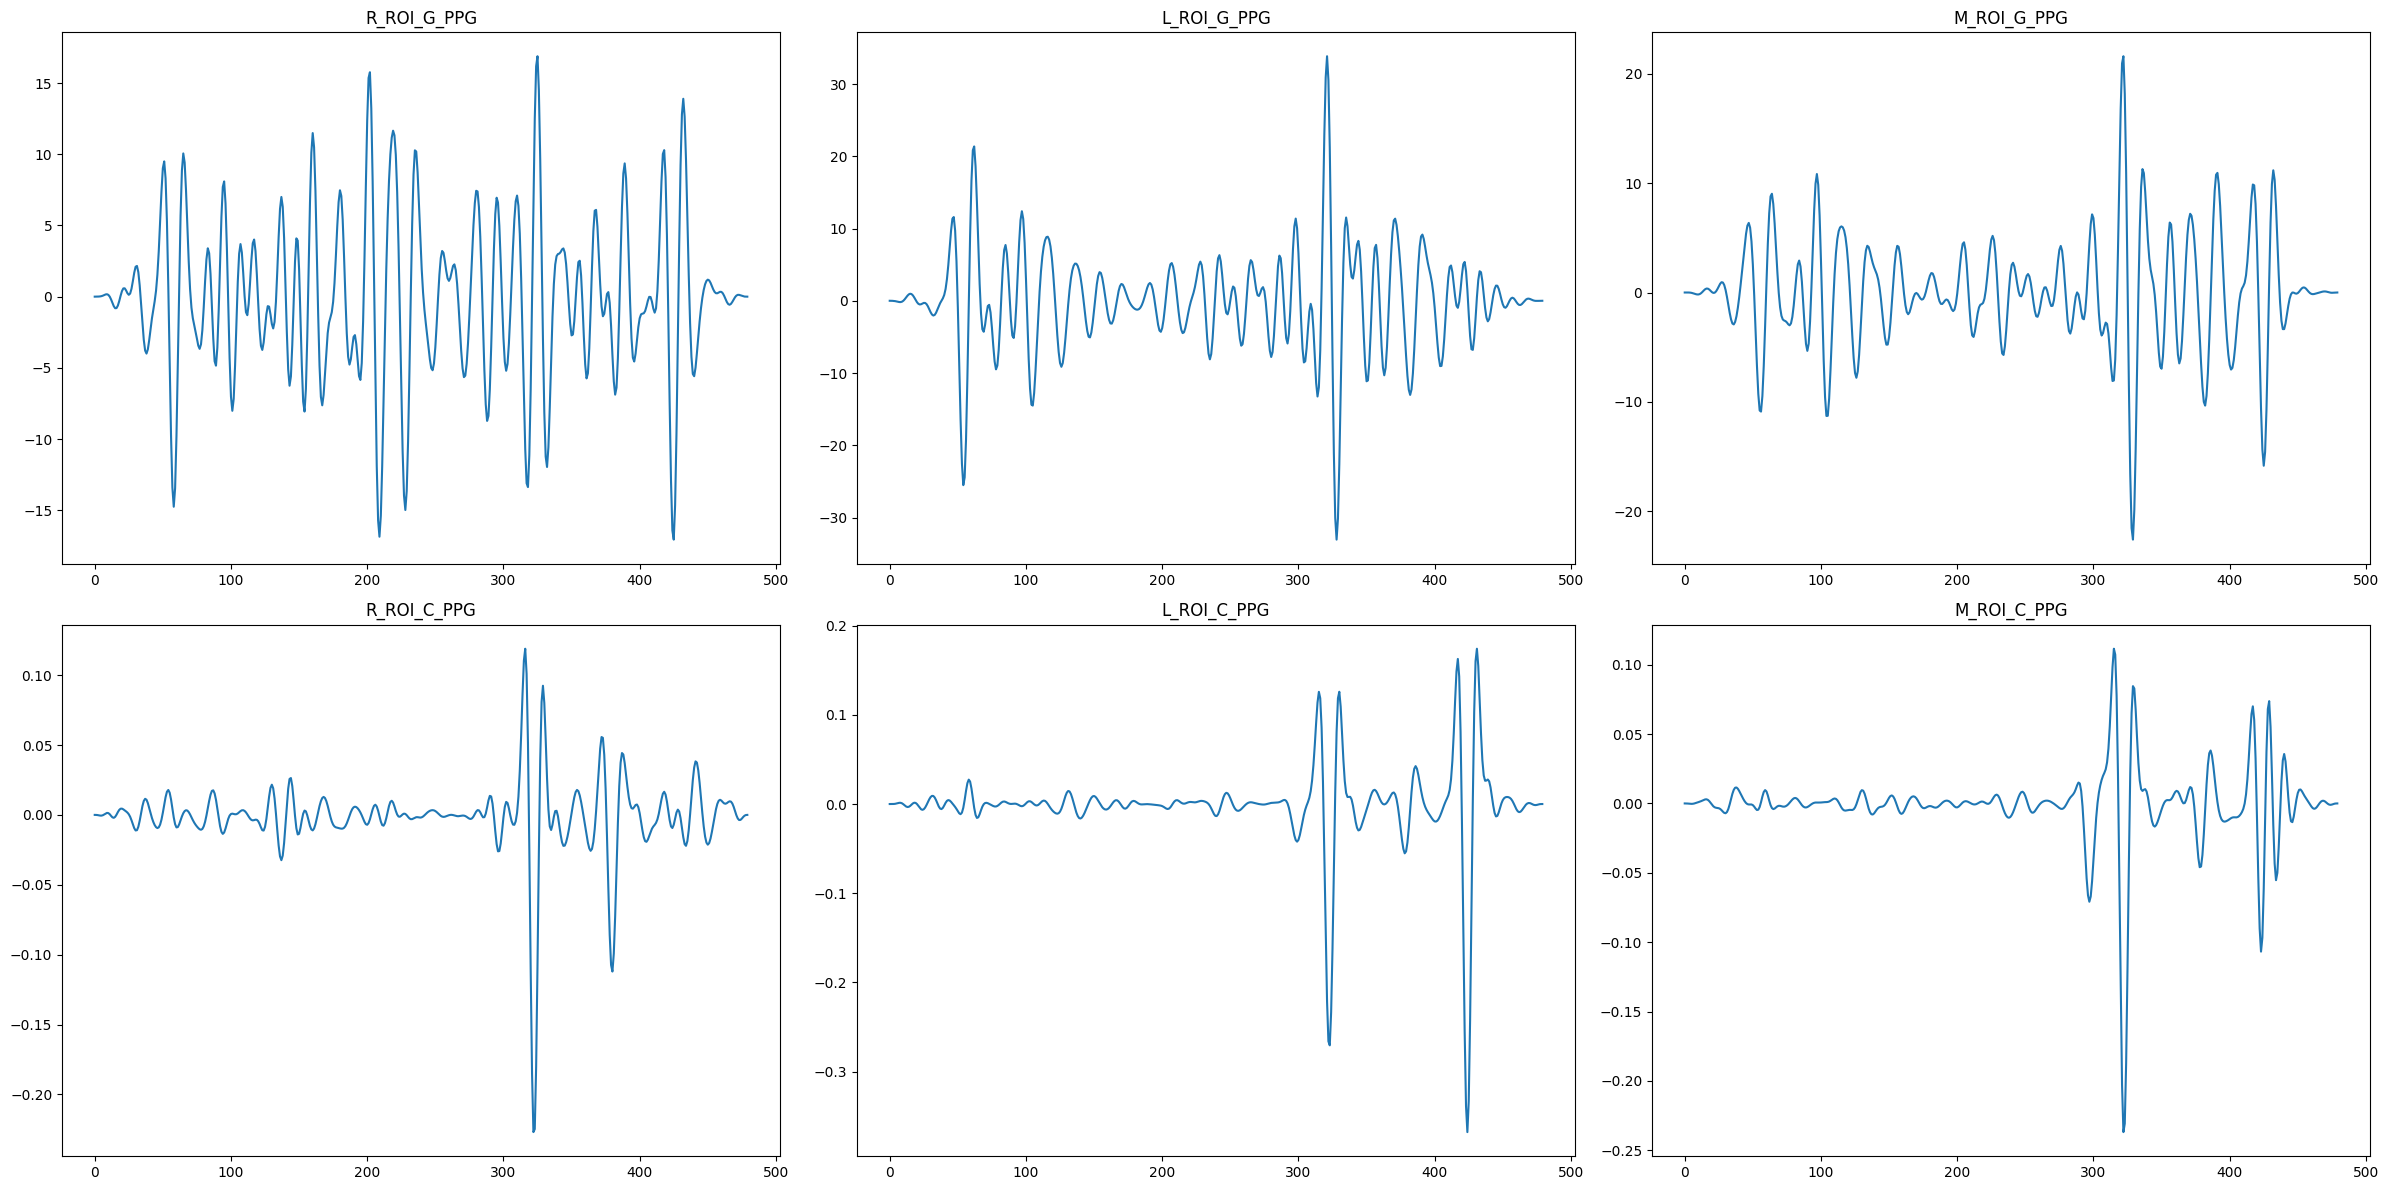

In [3]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots (2 rows and 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(24, 12))

# Plot data on the subplots
axs[0, 0].plot(R_ROI_G_PPG)
axs[0, 0].set_title('R_ROI_G_PPG')

axs[0, 1].plot(L_ROI_G_PPG)
axs[0, 1].set_title('L_ROI_G_PPG')

axs[0, 2].plot(M_ROI_G_PPG)
axs[0, 2].set_title('M_ROI_G_PPG')

axs[1, 0].plot(R_ROI_C_PPG)
axs[1, 0].set_title('R_ROI_C_PPG')

axs[1, 1].plot(L_ROI_C_PPG)
axs[1, 1].set_title('L_ROI_C_PPG')

axs[1, 2].plot(M_ROI_C_PPG)
axs[1, 2].set_title('M_ROI_C_PPG')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


PPG data successfully saved to ppg_data.json


In [4]:
import numpy as np
from utils.feature.feature_extractor import FeatureExtractor

fe = FeatureExtractor(L_ROI_C_PPG,M_ROI_G_PPG, R_ROI_G_PPG, L_ROI_C_PPG, M_ROI_C_PPG, R_ROI_C_PPG)
features = fe.feature_union()
features

ModuleNotFoundError: No module named 'signal_transformation'

(480,)

In [12]:
import cv2

b = region_means[:, 0, 0, :]
b.shape

(1200, 3)